# LOGISTIC with Chat GPT
> ShoulderFly

In [1]:
# Import the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/Users/paoloartasensi/Python_Scripts/artabax/Gdrive_csv/shoulderfly_20221223_1019PM.csv', header=0)

df.head()


,Time,Ax,Ay,Az,Gx,Gy,Gz,BAR,Pitch,Roll,UP,DOWN,prob
0,1671830330269,-7.754,-3.503,5.081,-0.716,0.512,0.744,0,20.699,-56.764,0,0,0
1,1671830330474,-7.695,-3.554,4.865,0.545,-0.013,-0.060,0,21.324,-57.699,0,0,0
2,1671830330679,-7.734,-3.637,4.790,0.264,0.512,0.499,0,21.790,-58.225,0,0,0
3,1671830330885,-7.791,-3.686,4.680,0.159,0.267,-0.516,0,22.077,-59.010,0,0,0
4,1671830331089,-7.697,-3.538,5.007,-0.156,-0.293,0.045,0,21.070,-56.954,0,0,0


In [2]:

count = df['UP'].value_counts()[1]
print(count)
shift = 3

#df = df.drop(columns=['Time','P','R','prob','UP', 'BAR'])
df

5


,Time,Ax,Ay,Az,Gx,Gy,Gz,BAR,Pitch,Roll,UP,DOWN,prob
0,1671830330269,-7.754,-3.503,5.081,-0.716,0.512,0.744,0,20.699,-56.764,0,0,0
1,1671830330474,-7.695,-3.554,4.865,0.545,-0.013,-0.060,0,21.324,-57.699,0,0,0
2,1671830330679,-7.734,-3.637,4.790,0.264,0.512,0.499,0,21.790,-58.225,0,0,0
3,1671830330885,-7.791,-3.686,4.680,0.159,0.267,-0.516,0,22.077,-59.010,0,0,0
4,1671830331089,-7.697,-3.538,5.007,-0.156,-0.293,0.045,0,21.070,-56.954,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1671830344781,-2.761,0.693,8.792,15.488,-33.262,1.444,0,-4.299,-17.432,0,0,0
70,1671830344988,-2.323,2.059,8.920,-1.381,-20.453,-2.370,0,-12.593,-14.596,0,0,0
71,1671830345192,-2.032,1.978,9.751,-6.560,-7.433,-3.561,0,-11.231,-11.769,0,0,0
72,1671830345409,-1.789,1.798,9.780,-1.906,-6.733,-0.866,0,-10.252,-10.366,0,0,0


In [3]:

df_temp = df.loc[df['UP'] == 1]
pos = np.array(df_temp.index)

df_temp.head(25)


,Time,Ax,Ay,Az,Gx,Gy,Gz,BAR,Pitch,Roll,UP,DOWN,prob
12,1671830332770,0.585,6.089,5.855,-8.871,6.777,-12.941,0,-45.977,5.709,1,0,0
23,1671830335101,-0.008,5.942,3.319,16.399,-43.273,-11.156,0,-60.814,-0.139,1,0,0
35,1671830337634,1.726,6.601,1.669,-11.181,-0.992,-7.551,0,-70.016,45.969,1,0,0
46,1671830339942,0.644,5.411,3.813,34.039,-28.852,-5.135,0,-54.444,9.580,1,0,0
58,1671830342481,1.556,7.531,0.578,10.064,-44.848,3.614,0,-77.569,69.615,1,0,0


In [4]:
#Aggiunge numeri 1 a quelli presenti nella colonna DOWN o UP
for i in pos:
    for k in range(-shift+1, shift, 1):
        df.at[i+k, 'UP'] = 1

df.dropna(inplace=True)


In [5]:
count = df['UP'].value_counts()[1]
print(count)
df

25


,Time,Ax,Ay,Az,Gx,Gy,Gz,BAR,Pitch,Roll,UP,DOWN,prob
0,1671830330269,-7.754,-3.503,5.081,-0.716,0.512,0.744,0,20.699,-56.764,0,0,0
1,1671830330474,-7.695,-3.554,4.865,0.545,-0.013,-0.060,0,21.324,-57.699,0,0,0
2,1671830330679,-7.734,-3.637,4.790,0.264,0.512,0.499,0,21.790,-58.225,0,0,0
3,1671830330885,-7.791,-3.686,4.680,0.159,0.267,-0.516,0,22.077,-59.010,0,0,0
4,1671830331089,-7.697,-3.538,5.007,-0.156,-0.293,0.045,0,21.070,-56.954,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1671830344781,-2.761,0.693,8.792,15.488,-33.262,1.444,0,-4.299,-17.432,0,0,0
70,1671830344988,-2.323,2.059,8.920,-1.381,-20.453,-2.370,0,-12.593,-14.596,0,0,0
71,1671830345192,-2.032,1.978,9.751,-6.560,-7.433,-3.561,0,-11.231,-11.769,0,0,0
72,1671830345409,-1.789,1.798,9.780,-1.906,-6.733,-0.866,0,-10.252,-10.366,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the columns containing the accelerometer and gyroscope data, plus Pitch&Roll
X = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Pitch', 'Roll']]

# Select the column containing the labels (0 for non-rep, 1 for rep)
y = df['UP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


from sklearn.metrics import accuracy_score, precision_score, recall_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 100.00%
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


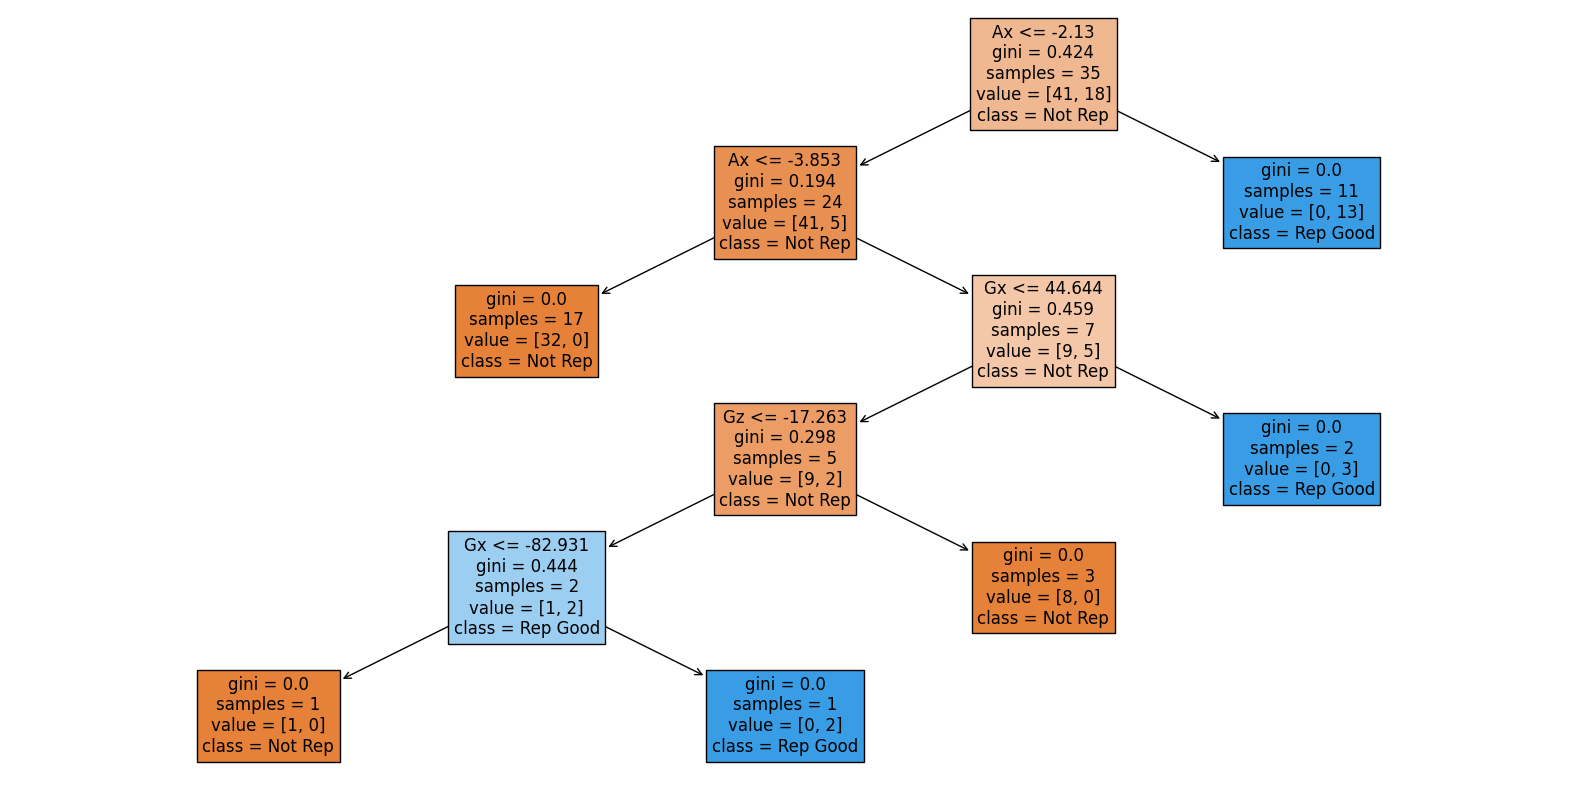

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree in the random forest
tree = model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Not Rep', 'Rep Good'], filled=True, fontsize=12)
plt.show()

# LOGISTIC REGRESSION

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 86.67%
Accuracy: 0.8666666666666667
Precision: 0.7142857142857143
Recall: 1.0


> PESI

In [9]:
# Print the weights (coefficients) for each feature with their corresponding labels (feature names)
for feature, coef in zip(X.columns, model.coef_[0]):
    print('{}: {}'.format(feature, coef))
print("b0",model.intercept_)

Ax: 0.28979965815831865
Ay: -0.06526364375884829
Az: -0.5197278409169391
Gx: 0.03925352892768719
Gy: 0.0466432827685604
Gz: 0.027477373045343437
Pitch: -0.10931594825800449
Roll: 0.05967744413187547
b0 [5.7623437]


In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(model, X_test, y_test,  labels=[0, 1])
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

## CONFUSION COLORED MATRIX

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
import seaborn as sns


log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='UP' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()